In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('../data/yields41.csv')
print(data.head())

   Unnamed: 0  nutrient01  nutrient02  nutrient03  nutrient04  nutrient05  \
0           0   13.762461    8.414643   17.849886    9.618564   10.719070   
1           4   15.630036   16.677772   16.229503    3.929429    6.790504   
2           6   22.759154   10.499183   17.504158   16.219819   14.178255   
3          11   10.162774    4.693038   16.228490   17.235522   17.739209   
4          13   15.674343   13.411142   16.955948    8.014505    3.654744   

   nutrient06  nutrient09  nutrient10  nutrient11  ...  nutrient16  \
0   12.771218    8.502311   23.235152   15.081610  ...   15.621965   
1    2.786080    7.420955   14.389509   22.442552  ...   11.647038   
2    4.237935    8.188753   11.047318   13.997132  ...    7.253158   
3   10.268212    8.325672   15.350965    7.763290  ...   13.713088   
4   10.276275    7.302756   14.433322   10.176111  ...   10.705272   

   nutrient17  nutrient18  nutrient19  nutrient20  nutrient21  nutrient22  \
0   12.046646    7.011413   11.623573  

In [37]:
corrMatrix = data.corr()
print(corrMatrix['yield'].sort_values())

Unnamed: 0    0.005116
nutrient01    0.028207
nutrient06    0.041711
nutrient12    0.041767
nutrient05    0.042268
nutrient18    0.047742
nutrient02    0.060415
nutrient16    0.060992
nutrient10    0.062535
nutrient21    0.067229
nutrient24    0.072152
nutrient23    0.076382
nutrient14    0.079075
nutrient19    0.079750
nutrient15    0.083787
nutrient20    0.091254
nutrient04    0.103151
nutrient11    0.106513
nutrient13    0.115731
nutrient17    0.126875
nutrient09    0.565068
nutrient03    0.701166
nutrient22    0.770726
yield         1.000000
Name: yield, dtype: float64


In [38]:
features = data.columns[1:]
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [39]:
pca = PCA()
principalComponents = pca.fit_transform(x)
explainedVariance = pca.explained_variance_ratio_

cumulativeVariance = np.cumsum(explainedVariance)
components = np.where(cumulativeVariance >= 0.8)[0][0] + 1

print(f"Components for 80%: {components}")

Components for 80%: 16


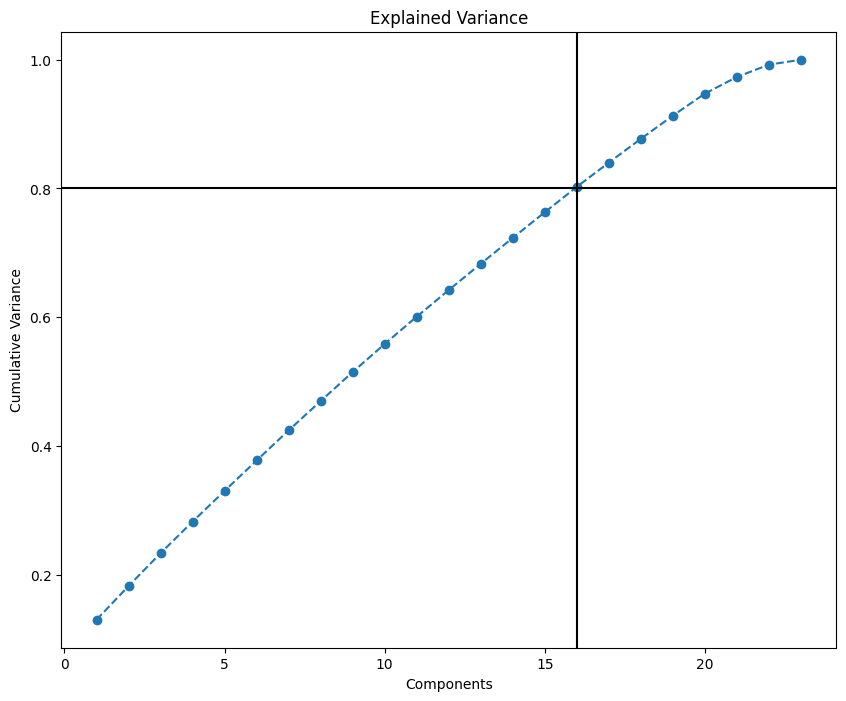

In [40]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(explainedVariance) + 1), cumulativeVariance, marker='o', linestyle='--')
plt.title('Explained Variance')
plt.xlabel('Components')
plt.ylabel('Cumulative Variance')
plt.axvline(x=components, color='black')
plt.axhline(y=0.8, color='black')
plt.show()

In [41]:
loading = pd.DataFrame(pca.components_[0:2, :], columns=features).T
loading.columns = ['PC1', 'PC2']

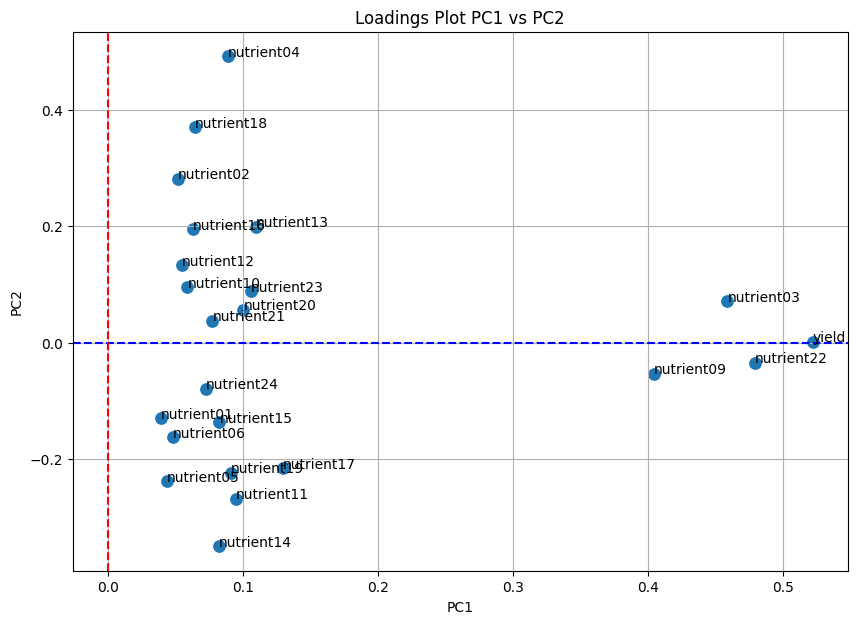

In [42]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=loading, x='PC1', y='PC2', s=100)

for i in range(loading.shape[0]):
    plt.text(loading.PC1[i], loading.PC2[i], loading.index[i])

plt.title('Loadings Plot PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0, color='blue', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()
